## Практическое задание 4

### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
pd.options.display.max_columns = 100

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
X = pd.DataFrame(boston.data, columns = boston.feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
y = pd.DataFrame(boston.target, columns = ["price"])
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [7]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


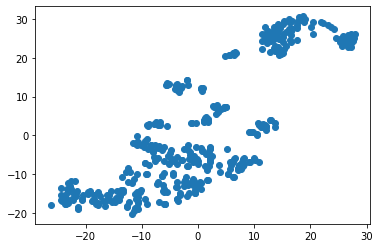

In [8]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

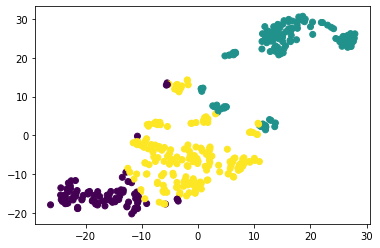

In [10]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [11]:
for claster in range(3):
    print(f"Кластер {claster}: средняя цена - {y_train[labels_train == claster].mean()[0]:.2f};", "CRIM - ", X_train["CRIM"][labels_train == claster].mean())

Кластер 0: средняя цена - 27.79; CRIM -  0.07356558139534886
Кластер 1: средняя цена - 16.17; CRIM -  10.797028425196853
Кластер 2: средняя цена - 24.96; CRIM -  0.42166020942408367


### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [12]:
labels_test = kmeans.predict(X_test_scaled)

In [13]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

print('До:\t{}'.format(X_test_scaled.shape))
print('После:\t{}'.format(X_test_tsne.shape))

До:	(102, 13)
После:	(102, 2)


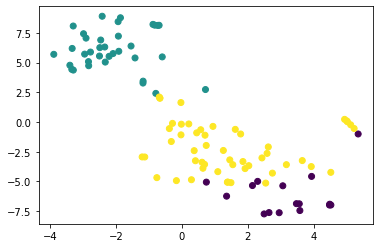

In [14]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [15]:
for claster in range(3):
    print(f"Кластер {claster} (тест): средняя цена - {y_test[labels_test == claster].mean()[0]:.2f};", "CRIM - ", X_test["CRIM"][labels_test == claster].mean())

Кластер 0 (тест): средняя цена - 31.35; CRIM -  0.062060000000000004
Кластер 1 (тест): средняя цена - 16.44; CRIM -  10.165531142857143
Кластер 2 (тест): средняя цена - 21.86; CRIM -  0.26607882352941176


Видим, что средние значения price и CRIM в разных кластерах на тестовых данных по значениям близки к таковым в тенировочных данных.

### Вопрос преполавателю: почему тогда на графиках визуально кластеры трениовочных и тестовых даных не совпадают?